# Report

---

This report describes the training implementation of the Banana Challenge using Deep Q Reinforcement Learning.


## Implementation


The implementation of consists of three classes:
* Arena which controls the execution of the training
* The Agent interacts with the environment and holds the implementation of Q-Learning 
* The QNetwork is a pytorch neural network to represent Q

In each episode, the Agent acts on the environment and gets a reward and the new state back. To find the best action for the current state, the QNetwork is evaluated and finally epsilon greedy action selection is applied to provide also a certain degree of random exploration.
To use the fixed Q-targets technique, there are actually two QNetworks that are updated during the learning steps. The agent holds also a replay memory to remove correlation in the observation sequence.

The Q-Network uses fully connected layers two of which are hidden. The size of the two hidden layers is configurable. The size of the input layer is given by the size of the state vector (37) and the output size by the size of the action vector (4). Both hidden layers have a reLu transformation at the end. 


### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!
The environment is already saved in the Workspace and can be accessed at the file path provided below. Please run the next code cell without making any changes.


In [1]:
!pip -q install ./python
from unityagents import UnityEnvironment
global_env=UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In the first run we use the default values for the size of the hidden layers which is 64. The environment is already solved after 600 episodes, but we let it run a little longer, just to be sure.

Agent created using device:  cpu
Episode 100	Average Score: 0.55
Episode 200	Average Score: 3.82
Episode 300	Average Score: 7.74
Episode 400	Average Score: 10.01
Episode 500	Average Score: 12.59
Episode 600	Average Score: 13.88
Episode 700	Average Score: 13.91
Episode 800	Average Score: 13.63
Episode 900	Average Score: 14.42
Episode 922	Average Score: 15.04
Environment solved in 822 episodes!	Average Score: 15.04


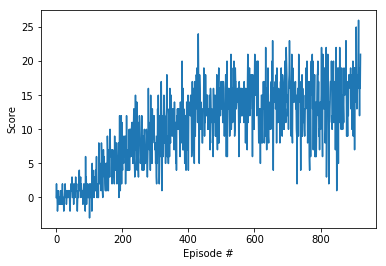

In [3]:
from dql_arena import Arena

arena = Arena(global_env)
arena.train_dqn(n_episodes=1000)
arena.plot_scores()
arena.save_model('model_15.pth')

We can see in the plot that the official threshold of 13.0 is already reached after 600 episodes and that the occasional maximum reward is about 25.0 which means there is room for improvement. The decline between episodes 600 - 800 is a sign of overfitting. In the next run the size of the hidden layers is therefore reduced.


Agent created using device:  cpu
Agent created using device:  cpu
Episode 100	Average Score: 0.87
Episode 200	Average Score: 4.15
Episode 300	Average Score: 7.68
Episode 400	Average Score: 10.54
Episode 500	Average Score: 13.69
Episode 600	Average Score: 13.77
Episode 700	Average Score: 14.06
Episode 800	Average Score: 15.54
Episode 900	Average Score: 15.86
Episode 1000	Average Score: 15.99
Episode 1100	Average Score: 16.49
Episode 1200	Average Score: 16.19
Episode 1300	Average Score: 16.14
Episode 1400	Average Score: 15.89
Episode 1497	Average Score: 17.07
Environment solved in 1397 episodes!	Average Score: 17.07


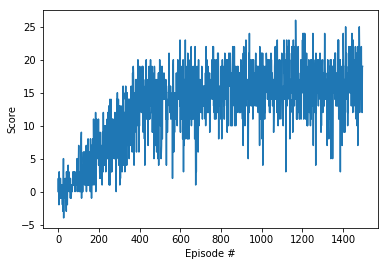

In [4]:
from dql_arena import Arena
from dql_agent import Agent

arena = Arena(global_env)
asm_agent = Agent(state_size=37, action_size=4, seed=0, fc1_units=19, fc2_units=12)
arena.agent = asm_agent
arena.threshold = 17.0 
arena.train_dqn(n_episodes=1800)
arena.plot_scores()
arena.save_model('model_17.pth')



The smaller network performs better, it reaches the average score 13 already after 500 episodes and reaches a 17 close to 1500 episodes.

### Future improvements

To further improve the performance of the agent, Double DQN could be applied to fight overestimation of action values. Or we could use Dueling DQN or prioritized experience replay. Even a combination of six different improvements together can be used to increase performance. This approach is called Rainbow.

When finished, you can close the environment.

In [9]:
global_env.close()